# Exploring tabular data

In [2]:
import pandas as pd 
from IPython.core.display import SVG
import seaborn as sns
import matplotlib.pyplot as plt

When working with tabular data, such as data stored in spreadsheets, pandas is a great tool. It can help you exploring, cleaning, and processing your data. With Pandas you should get familiar to the term: DataFrame.

A Dataframe is a two-dimensional table of rows and columns, much like a spreadsheet.



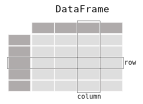

In [3]:
SVG('https://pandas.pydata.org/docs/_images/01_table_dataframe.svg')

How can you create a dataset?

In [4]:
df = pd.DataFrame(
    {
        "cell": ["Purkinje","Purkinje","Purkinje","Purkinje","Purkinje"],
        "location": ["brain1", "brain1", "brain2", "brain2", "brain1"],
        "spikes": ["simple", "complex", "simple", "complex", "simple"],
        "value": [3.3, 5.1, 2.5, 6.2, 2.8],
    }
)

df

,cell,location,spikes,value
0,Purkinje,brain1,simple,3.3
1,Purkinje,brain1,complex,5.1
2,Purkinje,brain2,simple,2.5
3,Purkinje,brain2,complex,6.2
4,Purkinje,brain1,simple,2.8


## Turn Your DataFrame Into a Pivot Table

A pivot table is useful to summarize and analyze the patterns in your data. Use use `pandas.pivot_table`.

In [5]:
pivot = pd.pivot_table(
    df, values="value", index=["cell", "location"], columns=["spikes"], aggfunc="mean"
)
pivot

spikes             complex  simple
cell     location                 
Purkinje brain1        5.1    3.05
         brain2        6.2    2.50

## You can also import from a file. In this case I will use pandas to import some analysis results

In [6]:
pwd

'/Users/haase/code/BioImageAnalysisNotebooks/docs/40_tabular_data_wrangling'

In [7]:
data = pd.read_csv('../../data/Results.csv', index_col=0, delimiter=';')
data

,Area,Mean,StdDev,Min,Max,X,Y,XM,YM,Major,Minor,Angle,%Area,Type
,,,,,,,,,,,,,,
1,18.0,730.389,103.354,592.0,948.0,435.000,4.722,434.962,4.697,5.987,3.828,168.425,100,A
2,126.0,718.333,90.367,556.0,1046.0,388.087,8.683,388.183,8.687,16.559,9.688,175.471,100,A
3,NaN,NaN,NaN,608.0,964.0,NaN,NaN,NaN,7.665,7.359,NaN,101.121,100,A
4,68.0,686.985,61.169,571.0,880.0,126.147,8.809,126.192,8.811,15.136,5.720,168.133,100,A
5,NaN,NaN,69.438,566.0,792.0,348.500,7.500,NaN,7.508,NaN,3.088,NaN,100,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,152.0,801.599,111.328,582.0,1263.0,348.487,497.632,348.451,497.675,17.773,10.889,11.829,100,A
388,17.0,742.706,69.624,620.0,884.0,420.500,496.382,420.513,NaN,NaN,3.663,49.457,100,A
389,60.0,758.033,77.309,601.0,947.0,259.000,499.300,258.990,499.289,9.476,8.062,90.000,100,A


## Unique type of cells

In [8]:
print(data.Type.unique())

['A' 'C' 'B']


## How do I select specific columns from a DataFrame?

How do I select specific columns from a DataFrame

In [9]:
area = data['Area']
print (area)

 
1       18.0
2      126.0
3        NaN
4       68.0
5        NaN
       ...  
387    152.0
388     17.0
389     60.0
390     12.0
391     23.0
Name: Area, Length: 391, dtype: float64


## Viewing the data

In [10]:
data.head(10) # top 10 rows

,Area,Mean,StdDev,Min,Max,X,Y,XM,YM,Major,Minor,Angle,%Area,Type
,,,,,,,,,,,,,,
1,18.0,730.389,103.354,592.0,948.0,435.000,4.722,434.962,4.697,5.987,3.828,168.425,100,A
2,126.0,718.333,90.367,556.0,1046.0,388.087,8.683,388.183,8.687,16.559,9.688,175.471,100,A
3,NaN,NaN,NaN,608.0,964.0,NaN,NaN,NaN,7.665,7.359,NaN,101.121,100,A
4,68.0,686.985,61.169,571.0,880.0,126.147,8.809,126.192,8.811,15.136,5.720,168.133,100,A
5,NaN,NaN,69.438,566.0,792.0,348.500,7.500,NaN,7.508,NaN,3.088,NaN,100,A
6,669.0,697.164,72.863,539.0,957.0,471.696,26.253,471.694,26.197,36.656,23.237,124.340,100,A
7,5.0,658.600,49.161,607.0,710.0,28.300,8.100,28.284,8.103,3.144,2.025,161.565,100,A
8,7.0,677.571,49.899,596.0,768.0,415.357,8.786,415.360,8.804,4.110,2.168,112.500,100,A
9,14.0,691.071,63.873,586.0,808.0,493.286,9.000,493.295,9.016,5.120,3.481,38.802,100,C


In [11]:
data.tail(10) # bottom 10 rows

,Area,Mean,StdDev,Min,Max,X,Y,XM,YM,Major,Minor,Angle,%Area,Type
,,,,,,,,,,,,,,
382,45.0,734.356,68.637,575.0,867.0,171.500,494.789,171.492,494.739,14.630,3.916,95.698,100,B
383,94.0,746.617,85.198,550.0,1021.0,194.032,498.223,194.014,498.239,17.295,6.920,52.720,100,B
384,35.0,776.257,74.746,611.0,961.0,268.957,493.586,268.977,NaN,NaN,5.990,111.193,100,A
385,35.0,739.286,NaN,593.0,928.0,291.871,493.843,291.871,493.806,NaN,5.352,79.368,100,A
386,14.0,736.143,81.533,646.0,902.0,315.000,493.000,314.989,493.003,NaN,3.676,45.000,100,A
387,152.0,801.599,111.328,582.0,1263.0,348.487,497.632,348.451,497.675,17.773,10.889,11.829,100,A
388,17.0,742.706,69.624,620.0,884.0,420.500,496.382,420.513,NaN,NaN,3.663,49.457,100,A
389,60.0,758.033,77.309,601.0,947.0,259.000,499.300,258.990,499.289,9.476,8.062,90.000,100,A
390,12.0,714.833,67.294,551.0,785.0,240.167,498.167,240.179,498.148,4.606,3.317,168.690,100,A


In [12]:
data.describe() #quick statistic summary of your data

,Area,Mean,StdDev,Min,Max,X,Y,XM,YM,Major,Minor,Angle,%Area
count,389.000000,386.000000,388.000000,388.000000,388.000000,389.000000,388.000000,388.000000,386.000000,383.000000,388.000000,390.000000,391.0
mean,107.164524,743.455565,76.575309,610.414948,962.922680,256.419859,254.384088,256.183338,253.353005,12.481016,9.500662,86.598441,100.0
std,241.037082,42.252140,31.844864,57.156709,244.897224,152.261694,155.080074,152.380388,154.426250,11.979176,49.714280,60.593686,0.0
min,1.000000,587.000000,0.000000,516.000000,587.000000,3.978000,4.722000,4.012000,4.697000,1.128000,1.128000,0.000000,100.0
25%,15.000000,717.060750,63.861000,570.750000,847.750000,127.142000,102.875250,126.923250,103.813750,5.098000,3.637250,34.517250,100.0
50%,44.000000,741.077500,74.727000,599.000000,917.500000,243.300000,271.490000,242.288000,271.272000,9.374000,5.886000,89.703500,100.0
75%,116.000000,767.260750,86.826500,633.250000,1014.500000,400.167000,395.058250,400.363500,393.800750,16.283000,9.017250,134.617250,100.0
max,2755.000000,912.938000,377.767000,877.000000,3880.000000,508.214000,503.022000,508.169000,502.979000,144.475000,981.000000,568.000000,100.0


## How can you transpose your dataset ?

In [13]:
data.T # or data.transpose()

,1,2,3,4,5,6,7,8,9,10,...,382,383,384,385,386,387,388,389,390,391
Area,18.0,126.0,NaN,68.0,NaN,669.0,5.0,7.0,14.0,39.0,...,45.0,94.0,35.0,35.0,14.0,152.0,17.0,60.0,12.0,23.0
Mean,730.389,718.333,NaN,686.985,NaN,697.164,658.6,677.571,691.071,763.615,...,734.356,746.617,776.257,739.286,736.143,801.599,742.706,758.033,714.833,695.043
StdDev,103.354,90.367,NaN,61.169,69.438,72.863,49.161,49.899,63.873,88.786,...,68.637,85.198,74.746,NaN,81.533,111.328,69.624,77.309,67.294,67.356
Min,592.0,556.0,608.0,571.0,566.0,539.0,607.0,596.0,586.0,623.0,...,575.0,550.0,611.0,593.0,646.0,582.0,620.0,601.0,551.0,611.0
Max,948.0,1046.0,964.0,880.0,792.0,957.0,710.0,768.0,808.0,1016.0,...,867.0,1021.0,961.0,928.0,902.0,1263.0,884.0,947.0,785.0,846.0
X,435.0,388.087,NaN,126.147,348.5,471.696,28.3,415.357,493.286,157.526,...,171.5,194.032,268.957,291.871,315.0,348.487,420.5,259.0,240.167,49.891
Y,4.722,8.683,NaN,8.809,7.5,26.253,8.1,8.786,9.0,12.731,...,494.789,498.223,493.586,493.843,493.0,497.632,496.382,499.3,498.167,503.022
XM,434.962,388.183,NaN,126.192,NaN,471.694,28.284,415.36,493.295,157.592,...,171.492,194.014,268.977,291.871,314.989,348.451,420.513,258.99,240.179,49.882
YM,4.697,8.687,7.665,8.811,7.508,26.197,8.103,8.804,9.016,12.757,...,494.739,498.239,NaN,493.806,493.003,497.675,NaN,499.289,498.148,502.979
Major,5.987,16.559,7.359,15.136,NaN,36.656,3.144,4.11,5.12,8.815,...,14.63,17.295,NaN,NaN,NaN,17.773,NaN,9.476,4.606,6.454


In [14]:
data.sort_values(by = "Mean", ascending=True) #sorting by a speficic measurement: Mean

,Area,Mean,StdDev,Min,Max,X,Y,XM,YM,Major,Minor,Angle,%Area,Type
,,,,,,,,,,,,,,
113,1.0,587.000,0.000,587.0,587.0,399.500,117.500,399.500,117.500,1.128,1.128,0.000,100,A
16,23.0,658.565,86.761,536.0,852.0,3.978,18.935,4.012,18.930,6.797,4.308,153.573,100,A
7,5.0,658.600,49.161,607.0,710.0,28.300,8.100,28.284,8.103,3.144,2.025,161.565,100,A
163,27.0,660.704,54.161,569.0,750.0,43.759,197.722,43.767,197.730,9.639,3.566,175.243,100,A
152,53.0,662.434,48.090,554.0,797.0,41.198,184.972,41.191,184.992,11.950,5.647,53.447,100,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,NaN,NaN,NaN,608.0,964.0,NaN,NaN,NaN,7.665,7.359,NaN,101.121,100,A
5,NaN,NaN,69.438,566.0,792.0,348.500,7.500,NaN,7.508,NaN,3.088,NaN,100,A
43,265.0,NaN,80.756,572.0,992.0,349.919,54.526,349.897,54.530,25.786,13.085,28.034,100,A


## Do you notice anything weird?

### There are rows at the bottom with NaN (Not a Number)

Wiki about NaN:

https://en.wikipedia.org/wiki/NaN#:~:text=In%20computing%2C%20NaN%20(%2Fn,especially%20in%20floating%2Dpoint%20arithmetic.

## Check for NaN under an entire DataFrame:

In [15]:
data.isnull().values.any()

True

## Count the NaN under an entire DataFrame:

In [16]:
data.isnull().sum().sum()

41

What is the percentage of nans for each column?

In [17]:
data.isnull().mean().sort_values(ascending=False) *100

Major     2.046036
Mean      1.278772
YM        1.278772
StdDev    0.767263
Min       0.767263
Max       0.767263
Y         0.767263
XM        0.767263
Minor     0.767263
Area      0.511509
X         0.511509
Angle     0.255754
%Area     0.000000
Type      0.000000
dtype: float64

## What to do?

It depends on your project and what is important or not for the analysis. Its not an easy answer.

## You can drop the rows for example or estimate the values

In [18]:
data_no_nan = data.dropna(how="any")
data_no_nan 

,Area,Mean,StdDev,Min,Max,X,Y,XM,YM,Major,Minor,Angle,%Area,Type
,,,,,,,,,,,,,,
1,18.0,730.389,103.354,592.0,948.0,435.000,4.722,434.962,4.697,5.987,3.828,168.425,100,A
2,126.0,718.333,90.367,556.0,1046.0,388.087,8.683,388.183,8.687,16.559,9.688,175.471,100,A
4,68.0,686.985,61.169,571.0,880.0,126.147,8.809,126.192,8.811,15.136,5.720,168.133,100,A
6,669.0,697.164,72.863,539.0,957.0,471.696,26.253,471.694,26.197,36.656,23.237,124.340,100,A
7,5.0,658.600,49.161,607.0,710.0,28.300,8.100,28.284,8.103,3.144,2.025,161.565,100,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,94.0,746.617,85.198,550.0,1021.0,194.032,498.223,194.014,498.239,17.295,6.920,52.720,100,B
387,152.0,801.599,111.328,582.0,1263.0,348.487,497.632,348.451,497.675,17.773,10.889,11.829,100,A
389,60.0,758.033,77.309,601.0,947.0,259.000,499.300,258.990,499.289,9.476,8.062,90.000,100,A


In [19]:
data_no_nan.isnull().values.any()

False

## You can fill NaN values with  the mean for each column

In [20]:
column_means = data.mean(axis=0, numeric_only=True)
print(column_means)

Area      107.164524
Mean      743.455565
StdDev     76.575309
Min       610.414948
Max       962.922680
X         256.419859
Y         254.384088
XM        256.183338
YM        253.353005
Major      12.481016
Minor       9.500662
Angle      86.598441
%Area     100.000000
dtype: float64


In [21]:
data_fill_mean = data.fillna(column_means, inplace= False)
data_fill_mean

,Area,Mean,StdDev,Min,Max,X,Y,XM,YM,Major,Minor,Angle,%Area,Type
,,,,,,,,,,,,,,
1,18.000000,730.389000,103.354000,592.0,948.0,435.000000,4.722000,434.962000,4.697000,5.987000,3.828000,168.425000,100,A
2,126.000000,718.333000,90.367000,556.0,1046.0,388.087000,8.683000,388.183000,8.687000,16.559000,9.688000,175.471000,100,A
3,107.164524,743.455565,76.575309,608.0,964.0,256.419859,254.384088,256.183338,7.665000,7.359000,9.500662,101.121000,100,A
4,68.000000,686.985000,61.169000,571.0,880.0,126.147000,8.809000,126.192000,8.811000,15.136000,5.720000,168.133000,100,A
5,107.164524,743.455565,69.438000,566.0,792.0,348.500000,7.500000,256.183338,7.508000,12.481016,3.088000,86.598441,100,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,152.000000,801.599000,111.328000,582.0,1263.0,348.487000,497.632000,348.451000,497.675000,17.773000,10.889000,11.829000,100,A
388,17.000000,742.706000,69.624000,620.0,884.0,420.500000,496.382000,420.513000,253.353005,12.481016,3.663000,49.457000,100,A
389,60.000000,758.033000,77.309000,601.0,947.0,259.000000,499.300000,258.990000,499.289000,9.476000,8.062000,90.000000,100,A


## Have a look for example to the third row

It is filled with the means for each numeric column that was missing

## Ploting is also extremely useful and important to check your data. 

Seaborn is a great library that helps with easy ploting of your datasets
Link: https://seaborn.pydata.org/

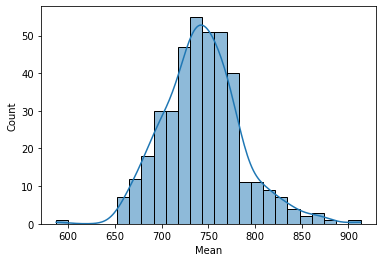

In [22]:
sns.histplot(data = data_fill_mean,  x ='Mean', kde = True);

Text(0.5, 0, 'Value')

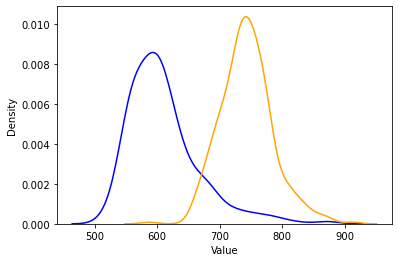

In [23]:
sns.kdeplot(data = data_fill_mean,  x ='Min', color= 'blue');
sns.kdeplot(data = data_fill_mean,  x ='Mean' ,color = 'orange');
plt.xlabel('Value')

## Plot pairwise relationships in a dataset in a fast and easy way

You can for example split by type of cell using `hue`

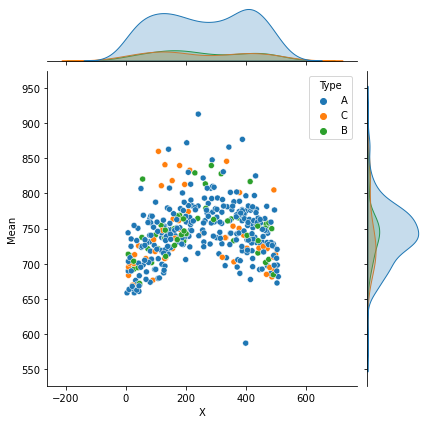

In [24]:
sns.jointplot(data = data_fill_mean,
              x ='X', 
              y= 'Mean',
              hue= 'Type');